In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
crime = pd.read_csv('avocado.csv')
crime.head()

,num,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
import pandas as pd 

type = {'conventional': 1,'organic': 0} 
  
crime.type = [type[item] for item in crime.type] 
print(crime)

       num        Date  AveragePrice  Total Volume       4046       4225  \
0        0  2015-12-27          1.33      64236.62    1036.74   54454.85   
1        1  2015-12-20          1.35      54876.98     674.28   44638.81   
2        2  2015-12-13          0.93     118220.22     794.70  109149.67   
3        3  2015-12-06          1.08      78992.15    1132.00   71976.41   
4        4  2015-11-29          1.28      51039.60     941.48   43838.39   
5        5  2015-11-22          1.26      55979.78    1184.27   48067.99   
6        6  2015-11-15          0.99      83453.76    1368.92   73672.72   
7        7  2015-11-08          0.98     109428.33     703.75  101815.36   
8        8  2015-11-01          1.02      99811.42    1022.15   87315.57   
9        9  2015-10-25          1.07      74338.76     842.40   64757.44   
10      10  2015-10-18          1.12      84843.44     924.86   75595.85   
11      11  2015-10-11          1.28      64489.17    1582.03   52677.92   
12      12  

In [4]:
X = crime.drop(['type','Date','region'], axis=1)
X.head()

,num,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [5]:
y = crime["type"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [7]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

In [8]:
    model2 = RandomForestClassifier(criterion='entropy',
                                    n_estimators=15,
                                    random_state = 0,
                                    max_depth=3,
                                    min_samples_split=5,
                                    min_samples_leaf=4,
                                    max_leaf_nodes=5,
                                    n_jobs=-1,
                                )

In [9]:
model1.fit(X_train,y_train)

C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=5,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [13]:
prediction2 = pd.DataFrame()
prediction2 = model2.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))

Accuracy score for test data with model 1 is: 0.9956169186938417
Accuracy score for test data with model 2 is: 0.9570458031996494


In [15]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction1))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction2))

Confusion matrix for test data with model 2 is:
 [[2262    9]
 [  11 2281]]
Confusion matrix for test data with model 2 is:
 [[2113  158]
 [  38 2254]]


In [16]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,prediction1)
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2)
print('Precision score for test data using model2 is:', precision2)

Precision score for test data using model1 is: 0.9960698689956332
Precision score for test data using model2 is: 0.9344941956882256


In [17]:
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,prediction1))   
print('Recall score for test data using model2 is:',recall_score(y_test,prediction2))

Recall score for test data using model1 is: 0.9952006980802792
Recall score for test data using model2 is: 0.9834205933682374


In [18]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, prediction1))
print('F1_score for test data using model2 is:',f1_score(y_test, prediction2))

F1_score for test data using model1 is: 0.9956350938454822
F1_score for test data using model2 is: 0.9583333333333334


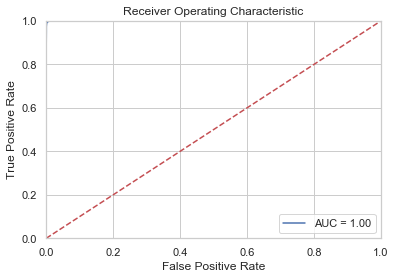

In [19]:
from sklearn import metrics
probs = model1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

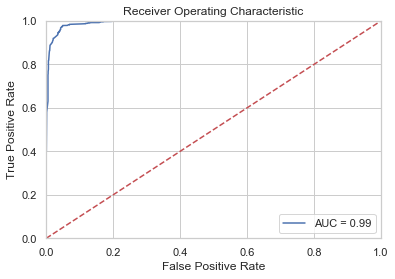

In [20]:
from sklearn import metrics
probs = model2.predict_proba(X_test)
pred = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()